In [ ]:
! pip install sklearn
! pip install xgboost

In [2]:
import pandas as pd
import numpy as np

In [3]:
RANDOM_STATE = 42
results = pd.DataFrame(columns = ['model', 'task', 'accuracy'])

https://archive.ics.uci.edu/ml/datasets/wine+quality

In [4]:
data = pd.read_csv('winequality-red.csv', sep = ';')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


1.Разделите выборку на обучающую и тестовую в отношении 70%/30%, предварительно выделив целевую переменную (колонка 'quality').

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
df = data.drop(columns=['quality'])
target = data['quality'].to_numpy() - 3

In [77]:
X_train, X_test, Y_train, Y_test = train_test_split(df.values, target, test_size=0.3, random_state=948)

2.Оцените качество на тестовой выборке по метрике accuracy для классификаторов:

DecisionTreeClassifier

BaggingClassifier со 100 деревьями

RandomForestClassifier со 100 деревьями

Сравните результаты и напишите какой вывод можно сделать.

In [78]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

In [79]:
from sklearn.metrics import accuracy_score

In [80]:
def model_predict(model, sample=X_test):
  return model.predict(sample)

def compute_accuracy_score(model, sample=X_test, labels=Y_test):
  pred = model.predict(sample)
  return accuracy_score(labels, pred)

In [81]:
DT = DecisionTreeClassifier()
Bagging = BaggingClassifier(n_estimators=100)
RF = RandomForestClassifier(n_estimators=100)

for model in [DT, Bagging, RF]:
  model.fit(X_train, Y_train)

acc_DT = compute_accuracy_score(DT)
acc_Bagging = compute_accuracy_score(Bagging)
acc_RF = compute_accuracy_score(RF)
results.loc[0] = ['DecisionTreeClassifier', 'task2', acc_DT]
results.loc[1] = ['BaggingClassifier ', 'task2', acc_Bagging]
results.loc[2] = ['RandomForestClassifier', 'task2', acc_RF]

Точность предсказания модели случайного леса самая большая. Это довольно логично т.к. он состоит из множества деревьев решения. При этом точность bagging классификатора сравнима с точностью RF. И это тоже логично т.к. в сущности модели RF и Bagging очень похожи

3.Посчитайте качество на тестовой выборке по метрике accuracy для классификатора RandomForestClassifier, используя значения деревьев:
    
10, 50, 100, 200, далее с шагом 200 до 5000 деревьев.
Постройте график зависимости качества от числа деревьев.



In [84]:
from matplotlib import pyplot as plt

Обучается ~5 минут

In [17]:
num_trees = [10, 50, 100, 200, *list(range(400, 5000, 200))]

rf_accuracy_list = np.zeros(len(num_trees))
for i, n in enumerate(num_trees):
  model = RandomForestClassifier(n_estimators=n)
  model.fit(X_train, Y_train)
  rf_accuracy_list[i] = compute_accuracy_score(model)

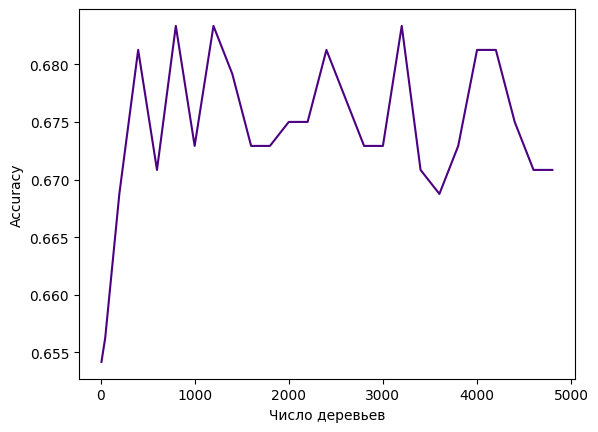

In [20]:
# теперь строим график
plt.plot(num_trees, rf_accuracy_list, color='indigo')
plt.xlabel('Число деревьев')
plt.ylabel('Accuracy')
plt.show()

4.Обучите реализации градиентного бустинга с параметрами по умолчанию из библиотек sklearn и xgboost. Сравните значение метрики accuracy по cross_val_score

In [22]:
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [37]:
from sklearn.model_selection import cross_val_score

У нас в данных классы вида [3, 4, 5, 6, 7, 8] а xgb принимает классы вида [0, 1, 2, 3, 4, 5] поэтому в начале нотбука сделаем сдвиг параметров на 3

In [39]:
sklearn_gb = GradientBoostingClassifier()
xgb = XGBClassifier()

sklearn_gb.fit(X_train, Y_train)
xgb.fit(X_train, Y_train)

acc_sklearn = cross_val_score(sklearn_gb, X_test, Y_test, scoring='accuracy', cv=3).mean()
acc_xgboost = cross_val_score(xgb, X_test, Y_test, scoring='accuracy', cv=3).mean()
results.loc[3] = ['GradientBoostingClassifier', 'task4', acc_sklearn]
results.loc[4] = ['XGBClassifier', 'task4', acc_xgboost]

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(


In [85]:
results

,model,task,accuracy
0,DecisionTreeClassifier,task2,0.564583
1,BaggingClassifier,task2,0.656250
2,RandomForestClassifier,task2,0.681250
3,GradientBoostingClassifier,task4,0.585417
4,XGBClassifier,task4,0.587500
5,GradientBoostingClassifier_CV,task5,0.006250
6,XGBClassifier_CV,task5,0.002083
7,LGBMClassifier,task6,0.604167
8,CatBoostClassifier,task6,0.585417
11,XGBClassifier_optuna,task8,0.002083


Модели не сильно отличаются по метрики accuracy если использовать 3 фолда

5.Подберите оптимальные параметры этих алгоритмов с помощью GridSearchCV(cv=3).
Параметры для оптимизации:

скорость обучения

количество деревьев

глубина деревьев

Сравните значение метрики accuracy. Выведите лучшие параметры алгоритмов.

In [90]:
from sklearn.model_selection import GridSearchCV

Время поиска параметром ~15 минут

In [91]:
parameters = {'learning_rate': [10 ** x for x in range(-5, 0, 1)],
              'n_estimators': [10, 50, 100, *list(range(200, 600, 100))],
              'max_depth': [i for i in range(2, 6, 1)]
              }

grid_gb = GridSearchCV(GradientBoostingClassifier(), parameters, cv=3, n_jobs=4)
grid_xgb = GridSearchCV(XGBClassifier(), parameters, cv=3, n_jobs=4)

for g in [grid_gb, grid_xgb]:
  g.fit(X_train, Y_train)

In [93]:
best_params_sklearn = grid_gb.best_params_
print('Параметры лучшей модели sklearn:\n', best_params_sklearn)
best_params_xgboost = grid_xgb.best_params_
print('Параметры лучшей модели xgboost:\n', best_params_xgboost)
acc_sklearn_cv = compute_accuracy_score(grid_gb)
acc_xgboost_cv = compute_accuracy_score(grid_xgb)
results.loc[5] = ['GradientBoostingClassifier_CV', 'task5', acc_sklearn_cv]
results.loc[6] = ['XGBClassifier_CV', 'task5', acc_xgboost_cv]

Параметры лучшей модели sklearn:
 {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 500}
Параметры лучшей модели xgboost:
 {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50}


In [94]:
results

,model,task,accuracy
0,DecisionTreeClassifier,task2,0.564583
1,BaggingClassifier,task2,0.656250
2,RandomForestClassifier,task2,0.681250
3,GradientBoostingClassifier,task4,0.585417
4,XGBClassifier,task4,0.587500
5,GradientBoostingClassifier_CV,task5,0.675000
6,XGBClassifier_CV,task5,0.660417
7,LGBMClassifier,task6,0.604167
8,CatBoostClassifier,task6,0.585417
11,XGBClassifier_optuna,task8,0.002083


6.Обучите реализации градиентного бустинга с параметрами по умолчанию из библиотек lightgbm и catboost. Сравните значение метрики accuracy по cross_val_score по всем четырем реализациям.

In [53]:
! pip install catboost
! pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [54]:
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

In [56]:
CatBoostModel = CatBoostClassifier()
LGBMModel = LGBMClassifier()

for model in [CatBoostModel, LGBMModel]:
  model.fit(X_train, Y_train)

acc_lightgbm = cross_val_score(CatBoostModel, X_test, Y_test, scoring='accuracy', cv=3).mean()
acc_catboost = cross_val_score(LGBMModel, X_test, Y_test, scoring='accuracy', cv=3).mean()
results.loc[7] = ['LGBMClassifier', 'task6', acc_lightgbm]
results.loc[8] = ['CatBoostClassifier', 'task6', acc_catboost]

Learning rate set to 0.079582
0:	learn: 1.6874701	total: 64.9ms	remaining: 1m 4s
1:	learn: 1.6055728	total: 71.4ms	remaining: 35.6s
2:	learn: 1.5322098	total: 87.4ms	remaining: 29.1s
3:	learn: 1.4677153	total: 102ms	remaining: 25.5s
4:	learn: 1.4145641	total: 127ms	remaining: 25.3s
5:	learn: 1.3680652	total: 151ms	remaining: 25s
6:	learn: 1.3231160	total: 204ms	remaining: 28.9s
7:	learn: 1.2828129	total: 254ms	remaining: 31.5s
8:	learn: 1.2474077	total: 282ms	remaining: 31.1s
9:	learn: 1.2136180	total: 307ms	remaining: 30.4s
10:	learn: 1.1841101	total: 331ms	remaining: 29.7s
11:	learn: 1.1577550	total: 368ms	remaining: 30.3s
12:	learn: 1.1371826	total: 393ms	remaining: 29.8s
13:	learn: 1.1149872	total: 426ms	remaining: 30s
14:	learn: 1.0967731	total: 452ms	remaining: 29.7s
15:	learn: 1.0797502	total: 467ms	remaining: 28.7s
16:	learn: 1.0612586	total: 493ms	remaining: 28.5s
17:	learn: 1.0446517	total: 519ms	remaining: 28.3s
18:	learn: 1.0293558	total: 551ms	remaining: 28.4s
19:	learn: 1

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(


Learning rate set to 0.07466
0:	learn: 1.7262183	total: 19.3ms	remaining: 19.3s
1:	learn: 1.6654910	total: 30.2ms	remaining: 15.1s
2:	learn: 1.6051338	total: 39.4ms	remaining: 13.1s
3:	learn: 1.5575086	total: 75.3ms	remaining: 18.7s
4:	learn: 1.5110475	total: 90.3ms	remaining: 18s
5:	learn: 1.4638692	total: 117ms	remaining: 19.4s
6:	learn: 1.4185658	total: 147ms	remaining: 20.9s
7:	learn: 1.3795761	total: 164ms	remaining: 20.3s
8:	learn: 1.3467656	total: 177ms	remaining: 19.5s
9:	learn: 1.3132733	total: 193ms	remaining: 19.1s
10:	learn: 1.2836865	total: 202ms	remaining: 18.2s
11:	learn: 1.2549274	total: 213ms	remaining: 17.6s
12:	learn: 1.2311567	total: 224ms	remaining: 17s
13:	learn: 1.2056944	total: 235ms	remaining: 16.6s
14:	learn: 1.1825555	total: 257ms	remaining: 16.8s
15:	learn: 1.1644001	total: 279ms	remaining: 17.2s
16:	learn: 1.1424333	total: 303ms	remaining: 17.5s
17:	learn: 1.1231050	total: 312ms	remaining: 17s
18:	learn: 1.1038310	total: 316ms	remaining: 16.3s
19:	learn: 1.

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(


In [57]:
results

,model,task,accuracy
0,DecisionTreeClassifier,task2,0.564583
1,BaggingClassifier,task2,0.662500
2,RandomForestClassifier,task2,0.662500
3,GradientBoostingClassifier,task4,0.585417
4,XGBClassifier,task4,0.587500
5,GradientBoostingClassifier_CV,task5,0.006250
6,XGBClassifier_CV,task5,0.002083
7,LGBMClassifier,task6,0.604167
8,CatBoostClassifier,task6,0.585417


7.Подберите оптимальные параметры для алгоритмов градиентного бустинга из библиотек lightgbm и catboost с теми же условиями.
Сравните значение метрики accuracy. Выведите лучшие параметры алгоритмов.

In [100]:
parameters = {'learning_rate': [10 ** x for x in range(-5, 0, 1)],
              'n_estimators': [10, 50, 100, *list(range(200, 600, 100))],
              'max_depth': [i for i in range(2, 6, 1)]
              }

grid_catboost = GridSearchCV(CatBoostClassifier(), parameters, cv=3, n_jobs=4)
grid_lgbm = GridSearchCV(LGBMClassifier(), parameters, cv=3, n_jobs=4)

for g in [grid_catboost, grid_lgbm]:
  g.fit(X_train, Y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
2 fits failed out of a total of 420.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/catboost/core.py", line 5128, in fit
    self._fit(X, y, cat_features, text_features, embedding_features, None, sample_weight, None, None, None, None, baseline, use_best_model,
  File "/usr/local/lib/python3.9/dist-packages/catboost/core.py", line 2355, in _fit
    self._

0:	learn: 1.6566032	total: 5.31ms	remaining: 1.59s
1:	learn: 1.5523705	total: 8.92ms	remaining: 1.33s
2:	learn: 1.4672262	total: 12.5ms	remaining: 1.24s
3:	learn: 1.3991736	total: 16.2ms	remaining: 1.2s
4:	learn: 1.3388988	total: 19.9ms	remaining: 1.17s
5:	learn: 1.2860351	total: 23.6ms	remaining: 1.16s
6:	learn: 1.2450419	total: 27.3ms	remaining: 1.14s
7:	learn: 1.2105235	total: 31.2ms	remaining: 1.14s
8:	learn: 1.1766888	total: 35ms	remaining: 1.13s
9:	learn: 1.1470717	total: 38.6ms	remaining: 1.12s
10:	learn: 1.1214230	total: 42.1ms	remaining: 1.1s
11:	learn: 1.0991151	total: 45.6ms	remaining: 1.09s
12:	learn: 1.0788242	total: 49.3ms	remaining: 1.09s
13:	learn: 1.0598291	total: 52.8ms	remaining: 1.08s
14:	learn: 1.0384840	total: 56.4ms	remaining: 1.07s
15:	learn: 1.0228603	total: 60.1ms	remaining: 1.07s
16:	learn: 1.0099987	total: 63.6ms	remaining: 1.06s
17:	learn: 0.9977709	total: 67.3ms	remaining: 1.05s
18:	learn: 0.9866694	total: 71.1ms	remaining: 1.05s
19:	learn: 0.9733167	total

In [102]:
best_params_lightgbm = grid_lgbm.best_params_
print('Параметры лучшей модели lightgbm:\n', best_params_lightgbm)
best_params_catboost = grid_catboost.best_params_
print('Параметры лучшей модели catboost:\n', best_params_catboost)
acc_lightgbm_cv = compute_accuracy_score(grid_lgbm)
acc_catboost_cv = compute_accuracy_score(grid_catboost)
results.loc[9] = ['LGBMClassifier_CV', 'task7', acc_lightgbm_cv]
results.loc[10] = ['CatBoostClassifier_CV', 'task7', acc_catboost_cv]

Параметры лучшей модели lightgbm:
 {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Параметры лучшей модели catboost:
 {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}


8.Подберите оптимальные параметры алгоритма из библиотеки xgbost с помощью [optuna](https://github.com/optuna/optuna) . Параметры для оптимизации:

скорость обучения

количество деревьев

глубина деревьев

Сравните результат с поиском по сетке из sklearn. Выведите лучшие параметры алгоритма, найденные даным способом.

In [59]:
! pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.7/365.7 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.9/212.9 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 7.0 MB/s eta 0:00:00


In [62]:
import optuna

In [95]:
def objective(trial):
  params = {
    'max_depth': trial.suggest_int('max_depth', 1, 9),
    'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
    'n_estimators': trial.suggest_int('n_estimators', 50, 500),
  }
  # Fit the model
  optuna_model = XGBClassifier(**params)
  optuna_model.fit(X_train, Y_train)

  # Make predictions
  y_pred = optuna_model.predict(X_test)

  # Evaluate predictions
  accuracy = accuracy_score(Y_test, y_pred)
  return accuracy

In [96]:
study = optuna.create_study(direction='maximize')

[I 2023-04-25 06:12:12,194] A new study created in memory with name: no-name-842b5505-be8e-4379-b5af-6f26dc5f3806


In [97]:
study.optimize(objective, n_trials=50)

<ipython-input-95-75c68874bb62>:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
[I 2023-04-25 06:12:14,043] Trial 0 finished with value: 0.6416666666666667 and parameters: {'max_depth': 6, 'learning_rate': 0.9941133047553512, 'n_estimators': 251}. Best is trial 0 with value: 0.6416666666666667.
<ipython-input-95-75c68874bb62>:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
[I 2023-04-25 06:12:15,331] Trial 1 finished with value: 0.61875 and parameters: {'max_depth': 2, 'learning_rate': 0.015655473373130

In [98]:
trial = study.best_trial

best_params_xgboost_optuna = trial.params

model = XGBClassifier(**best_params_xgboost_optuna)
model.fit(X_train, Y_train)

print('Параметры лучшей модели xgboost:\n', best_params_xgboost_optuna)
acc_xgboost_optuna = compute_accuracy_score(model)
results.loc[11] = ['XGBClassifier_optuna', 'task8', acc_xgboost_optuna]

Параметры лучшей модели xgboost:
 {'max_depth': 5, 'learning_rate': 0.056766838414184, 'n_estimators': 261}


9.Выведите качество по метрике accuracy стэкинга (StackingClassifier) 4-х алгоритмов с базовыми параметрами градиентного бустинга.

In [71]:
from sklearn.ensemble import StackingClassifier

In [86]:
estimators = [
    ('gb', GradientBoostingClassifier()),
    ('xgb', XGBClassifier()),
    ('lgbm', LGBMClassifier()),
    ('catboost', CatBoostClassifier())
]

clf = StackingClassifier(estimators=estimators)

clf.fit(X_train, Y_train)

Streaming output truncated to the last 5000 lines.
4:	learn: 1.4261333	total: 34ms	remaining: 6.77s
5:	learn: 1.3792537	total: 40ms	remaining: 6.63s
6:	learn: 1.3329730	total: 45.8ms	remaining: 6.5s
7:	learn: 1.2936737	total: 51.9ms	remaining: 6.43s
8:	learn: 1.2571077	total: 57.9ms	remaining: 6.38s
9:	learn: 1.2226771	total: 66.3ms	remaining: 6.56s
10:	learn: 1.1939348	total: 71.9ms	remaining: 6.46s
11:	learn: 1.1675497	total: 77.5ms	remaining: 6.38s
12:	learn: 1.1446575	total: 83.2ms	remaining: 6.32s
13:	learn: 1.1232336	total: 89.4ms	remaining: 6.29s
14:	learn: 1.1023951	total: 95.8ms	remaining: 6.29s
15:	learn: 1.0832691	total: 105ms	remaining: 6.48s
16:	learn: 1.0648696	total: 112ms	remaining: 6.46s
17:	learn: 1.0477718	total: 118ms	remaining: 6.42s
18:	learn: 1.0311302	total: 124ms	remaining: 6.4s
19:	learn: 1.0159306	total: 130ms	remaining: 6.39s
20:	learn: 1.0033258	total: 137ms	remaining: 6.39s
21:	learn: 0.9922462	total: 143ms	remaining: 6.36s
22:	learn: 0.9807587	total: 149m

StackingClassifier(estimators=[('gb', GradientBoostingClassifier()),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=None,
                                              gpu_id=None, grow_policy=None,
                                              importance_type=None,
                                              in...
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              n_estimators=100, n_jobs=None,
                                              num_parallel_tree=None,
                                              predictor=None, random_state=None, ...)),
                               ('lgbm', LGBMClassifier()),
                               ('catboost',
                                <catboost.core.CatBoostClassifier object at 0x7fcb508ee340>)])

In [87]:
acc_stacking_default = clf.score(X_test, Y_test)
results.loc[12] = ['Stacking default', 'task9', acc_stacking_default]

In [88]:
acc_stacking_default

0.6645833333333333

10.Выведите качество по метрике accuracy стэкинга 4-х алгоритмов с оптимальными параметрами градиентного бустинга. Сравните результаты с предыдущим шагом и напишите какой вывод можно из этого сделать.

In [103]:
estimators = [
    ('gb', GradientBoostingClassifier(**best_params_sklearn)),
    ('xgb', XGBClassifier(**best_params_xgboost_optuna )),
    ('lgbm', LGBMClassifier(**best_params_lightgbm )),
    ('catboost', CatBoostClassifier(**best_params_catboost))
]

clf = StackingClassifier(estimators=estimators)

clf.fit(X_train, Y_train)

0:	learn: 1.6566032	total: 7.2ms	remaining: 2.15s
1:	learn: 1.5523705	total: 10.7ms	remaining: 1.6s
2:	learn: 1.4672262	total: 14.4ms	remaining: 1.42s
3:	learn: 1.3991736	total: 18.1ms	remaining: 1.34s
4:	learn: 1.3388988	total: 21.8ms	remaining: 1.29s
5:	learn: 1.2860351	total: 25.4ms	remaining: 1.24s
6:	learn: 1.2450419	total: 29ms	remaining: 1.21s
7:	learn: 1.2105235	total: 32.7ms	remaining: 1.19s
8:	learn: 1.1766888	total: 38.1ms	remaining: 1.23s
9:	learn: 1.1470717	total: 41.8ms	remaining: 1.21s
10:	learn: 1.1214230	total: 45.8ms	remaining: 1.2s
11:	learn: 1.0991151	total: 49.2ms	remaining: 1.18s
12:	learn: 1.0788242	total: 52.9ms	remaining: 1.17s
13:	learn: 1.0598291	total: 56.6ms	remaining: 1.16s
14:	learn: 1.0384840	total: 60.2ms	remaining: 1.14s
15:	learn: 1.0228603	total: 63.8ms	remaining: 1.13s
16:	learn: 1.0099987	total: 67.2ms	remaining: 1.12s
17:	learn: 0.9977709	total: 70.9ms	remaining: 1.11s
18:	learn: 0.9866694	total: 74.6ms	remaining: 1.1s
19:	learn: 0.9733167	total: 

StackingClassifier(estimators=[('gb',
                                GradientBoostingClassifier(learning_rate=0.01,
                                                           max_depth=4,
                                                           n_estimators=500)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=None,
                                              gpu_i...
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None, max_depth=5,
                                              max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              n_estimators=261, n_jobs=None,
                                              num_parallel_tree=None,
                                              predictor=None, random_state=None, ...)),
                               ('lgbm', LGBMClassifier(max_depth=5)),
                               ('catboost',
                                <catboost.core.CatBoostClassifier object at 0x7fcb507bbc70>)])

In [104]:
acc_stacking = clf.score(X_test, Y_test)
results.loc[13] = ['Stacking', 'task10', acc_stacking]

In [105]:
results

,model,task,accuracy
0,DecisionTreeClassifier,task2,0.564583
1,BaggingClassifier,task2,0.656250
2,RandomForestClassifier,task2,0.681250
3,GradientBoostingClassifier,task4,0.585417
4,XGBClassifier,task4,0.587500
5,GradientBoostingClassifier_CV,task5,0.675000
6,XGBClassifier_CV,task5,0.660417
7,LGBMClassifier,task6,0.604167
8,CatBoostClassifier,task6,0.585417
11,XGBClassifier_optuna,task8,0.683333


Из итоговой таблицы видно, что модель с оптимальными и дефолтными параметрами почти не отличаются. Более того - stacking всё ещё работает чуть хуже обычного Random Forest-а. Изменения метрик дают понять, что **данные** намного важнее, подбора модели и параметров. Сначала нужно выжить максмимум информации из данных с помощью Feature Engeneering-а, а уже потом пытаться подбирать оптимальные параметры и модель.